# Introducción a la Ciencia de Datos: Tarea 1

Este notebook contiene el código de base para realizar la Tarea 1 del curso. Puede copiarlo en su propio repositorio y trabajar sobre el mismo.
Las **instrucciones para ejecutar el notebook** están en la [página inicial del repositorio](https://gitlab.fing.edu.uy/maestria-cdaa/intro-cd).

Se utiliza el lenguaje Python y la librería Pandas. Si no tiene ninguna familiaridad con la librería, se recomienda realizar algún tutorial introductorio (ver debajo).
También se espera que los alumnos sean proactivos a la hora de consultar las documentaciones de las librerías y del lenguaje, para entender el código provisto.
Además de los recursos provistos en la [página del curso](https://eva.fing.edu.uy/course/view.php?id=1378&section=1), los siguientes recursos le pueden resultar interesantes:
 - [Pandas getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) y [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html): Son parte de la documentación en la página oficial de Pandas.
 - [Kaggle Learn](https://www.kaggle.com/learn): Incluye tutoriales de Python y Pandas.


Si desea utilizar el lenguaje R y está dispuesto a no utilizar (o traducir) este código de base, también puede hacerlo.

En cualquier caso, **se espera que no sea necesario revisar el código para corregir la tarea**, ya que todos los resultados y análisis relevantes deberían estar en el **informe en formato PDF**.

## Cargar bibliotecas (dependencias)
Recuerde instalar los requerimientos (`requirements.txt`) en el mismo entorno donde está ejecutando este notebook (ver [README](https://github.com/DonBraulio/introCD)).

In [1]:
from time import time
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Agregue aqui el resto de las librerias que necesite
# from ...
# import ...

## Lectura de Datos

In [3]:
# DataFrame con todos los discursos:
df_speeches = pd.read_csv('../data/us_2020_election_speeches.csv')
df_speeches

# listar todas las locations sin repetir
#locations = df_speeches['location'].unique()
#locations

# listar todos los types sin repetir
# types = df_speeches['type'].unique()
# types

,speaker,title,text,date,location,type
0,David Perdue,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\r\nHow great is it to be...,"Oct 16, 2020","Macon, Georgia",Campaign Speech
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\r\nThank you. What a ...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\r\nHey, and wel...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,"Oct 15, 2020",NBC,Town Hall
...,...,...,...,...,...,...
264,Bernie Sanders,Bernie Sanders Speech Transcript: Sanders Spea...,Bernie Sanders: (00:00)\r\nJust want to take t...,"Feb 6, 2020",Iowa,Campaign Speech
265,Democratic Candidates,Transcript: Speeches at the Iowa Caucuses – Be...,Bernie Sanders: (00:08)\r\nThank you. Thank yo...,"Feb 4, 2020",Iowa,Campaign Speech
266,Donald Trump,Donal Trump Iowa Rally Transcript: Trump Holds...,Donald Trump: (00:24)\r\nI worked so hard for ...,"Jan 30, 2020","Des Moines, Iowa",Campaign Speech
267,Donald Trump,Donald Trump New Jersey Rally Speech Transcrip...,Donald Trump: (01:22)\r\nThank you. Thank you....,"Jan 28, 2020","Wildwood, New Jersey",Campaign Speech


In [5]:
# Chequear si existen NaNs
df_speeches.isna().any().any()  # Da como reusltado True o False dependiendo si el DataFrame posee NaNs entre sus datos.
# Localiar los NaNs dentro del DataFrame
print(df_speeches.isna().sum())
df_speeches[df_speeches.isna().any(axis=1)] # Filtra y devuelve solo las filas que poseen por los menos un NaN.
df_speeches_filled = df_speeches.fillna("missing")  #Cambia los NaN por la palabra "missing"
# Chequeo que mi nuevo DataFrame no tenga NaNs.
df_speeches_filled.isna().any().any() #Se espera que el resultado sea False.


speaker      3
title        0
text         0
date         0
location    18
type        21
dtype: int64


np.False_

In [8]:
# Analizar otras formas de datos faltantes
sospechosos = ["???", "-", "N/A", "missing", ""]  # Posibles formas que podrían aparecer como datos faltantes
df_speeches[df_speeches.isin(sospechosos).any(axis=1)] #Analizo otras formas de datos faltantes


,speaker,title,text,date,location,type
194,???,Joe Biden & Trump Surrogates Hold Town Hall fo...,"Vicky Nguyen: (08:06)\r\nHi, everyone. I’m inv...","Jun 27, 2020",NaN,NaN


# Parte 1: Cargado y Limpieza de Datos

## Exploración de Datos

In [10]:
# TODO: Analice la cantidad de discursos por candidato

# Tome los 5 candidatos con más discursos
df_speeches_top_5 = df_speeches_filled['speaker'].value_counts().head(5)  # Analizo el número de apariciones de cada candidato en mi DataFrame y me quedo con el top 5.
print(df_speeches_top_5)
# DataFrame con los datos de los 5 candidatos con más discursos
df_speeches_top_5_df = df_speeches_filled[df_speeches_filled['speaker'].isin(df_speeches_top_5.index)] #Creo un DataFrame que posea únicamente los discursos de los 5 candidatos con más discursos.
df_speeches_top_5_df

speaker
Joe Biden         71
Donald Trump      53
Mike Pence        19
Bernie Sanders    16
Kamala Harris     11
Name: count, dtype: int64


,speaker,title,text,date,location,type
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\r\nThank you. What a ...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\r\nHey, and wel...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,"Oct 15, 2020",NBC,Town Hall
5,Donald Trump,"Donald Trump Campaign Rally Greenville, NC Tra...",Donald Trump: (01:25)\r\nThank you very much. ...,"Oct 15, 2020","Greenville, North Carolina",Campaign Speech
...,...,...,...,...,...,...
257,Donald Trump,Donald Trump New Hampshire Rally Transcript Fe...,"Donald Trump: (02:41)\r\nHello, Manchester, an...","Feb 10, 2020",New Hampshire,Campaign Speech
260,Bernie Sanders,Bernie Sanders New Hampshire Town Hall Transcript,Bernie Sanders: (00:00)\r\nThank you. Thank yo...,"Feb 10, 2020",New Hampshire,Town Hall
264,Bernie Sanders,Bernie Sanders Speech Transcript: Sanders Spea...,Bernie Sanders: (00:00)\r\nJust want to take t...,"Feb 6, 2020",Iowa,Campaign Speech
266,Donald Trump,Donal Trump Iowa Rally Transcript: Trump Holds...,Donald Trump: (00:24)\r\nI worked so hard for ...,"Jan 30, 2020","Des Moines, Iowa",Campaign Speech


## Visualizaciones

                Jan  Feb  Mar  Apr  May  Jun  Jul  Ago  Sep  Oct
speaker                                                         
Bernie Sanders  NaN  4.0  6.0  2.0  NaN  NaN  NaN  NaN    1    2
Donald Trump    2.0  5.0  1.0  NaN  1.0  2.0  1.0  NaN   24   10
Joe Biden       NaN  3.0  7.0  4.0  5.0  4.0  9.0  NaN   20   14
Kamala Harris   NaN  NaN  1.0  NaN  NaN  NaN  1.0  NaN    6    1
Mike Pence      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    7    7


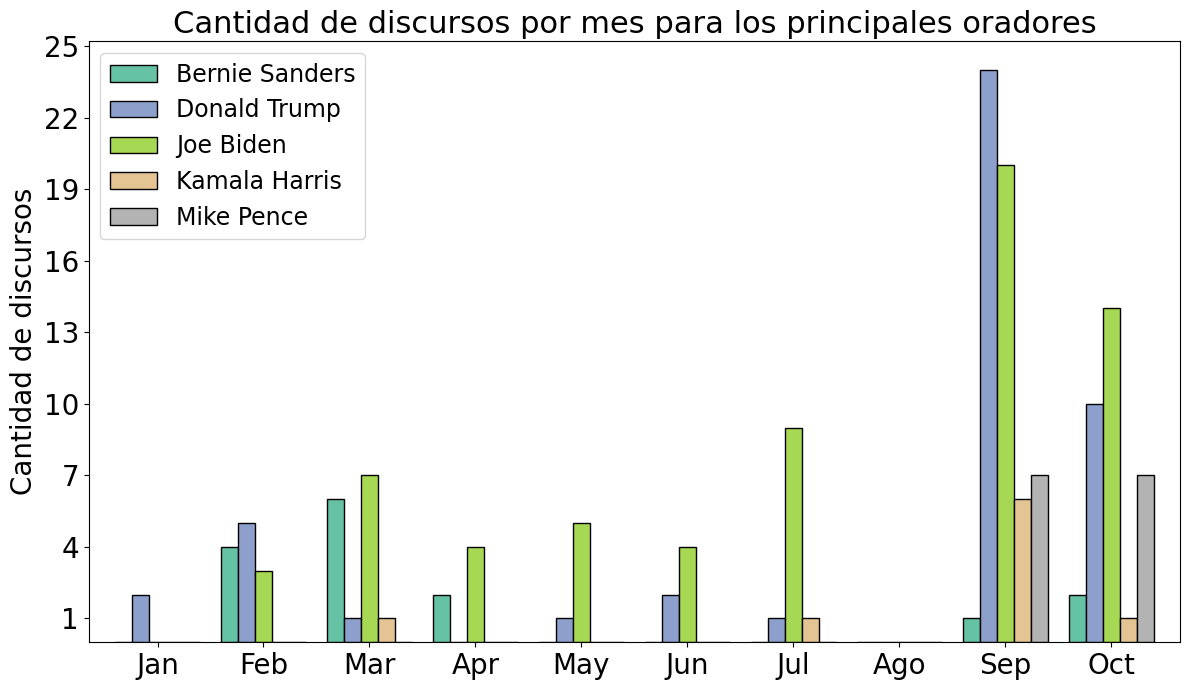

In [39]:
# TODO: Visualización de los discursos de cada candidato a lo largo del tiempo 
Meses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Ago", "Sep", "Oct"] #La escala temporal seleccionada es mensual. 
cantidad_disc_por_mes = {}  #Creo un diccionario que incluirá la cantidad de discursos por mes de cada candidato
for month in Meses:
# Quiero quedarme con la cantidad de discursos por mes en Meses
    df_mes = df_speeches_top_5_df[df_speeches_top_5_df['date'].str.contains(month, na=False)] #checks if "Oct" appears in the string and ignores missing values
    cantidad_disc_por_mes[month] = df_mes['speaker'].value_counts()

#print(cantidad_disc_por_mes["Oct"].values)  #Los valores NaN quieren decir que el candidato no dio un discurso en ese mes.

#Generar un grafico de barras que tenga cantidad de discursos por mes para cada candidato

df_cantidad = pd.DataFrame(cantidad_disc_por_mes)  # Creo un DataFrame para facilitar la creación del gráfico de barras.
print(df_cantidad)
# Gráfico de barras agrupado
ax = df_cantidad.T.plot(kind='bar', figsize=(12, 7), width=0.8, edgecolor='black', colormap='Set2')

# Título y etiquetas
plt.title("Cantidad de discursos por mes para los principales oradores", fontsize=22)
plt.ylabel("Cantidad de discursos", fontsize=20)
plt.yticks(ticks=range(1, 27,3), labels=range(1, 27,3), rotation=0, fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', fontsize=17)

plt.tight_layout()
plt.show()

## Limpieza de Texto y Conteo de Palabras

In [88]:
import re

def expand_contractions(text):
    contractions = {
        r"\bcan’t\b": "cannot",   #con el r indico que es una cadena cruda, por ende el \b me separa la palabra can't de otras palabras que la contengan.
        r"\bwon’t\b": "will not",
        r"\bit’s\b": "it is",
        r"\bi’m\b": "i am",
        r"\bi’ve\b": "i have",
        r"\bi’d\b": "i would",
        r"\bi’ll\b": "i will",
        r"\byou’re\b": "you are",
        r"\byou’ve\b": "you have",
        r"\byou’d\b": "you would",
        r"\byou’ll\b": "you will",
        r"\bhe’s\b": "he is",
        r"\bshe’s\b": "she is",
        r"\bthey’re\b": "they are",
        r"\bwe’re\b": "we are",
        r"\bdon’t\b": "do not",
        r"\bdidn’t\b": "did not",
        r"\bdoesn’t\b": "does not",
        r"\bwasn’t\b": "was not",
        r"\bweren’t\b": "were not",
        r"\bcouldn’t\b": "could not",
        r"\bshouldn’t\b": "should not",
        r"\bwouldn’t\b": "would not",
        r"\bthat’s\b": "that is",
        r"\bthere’s\b": "there is",
        r"\bwhat’s\b": "what is",
        r"\bwho’s\b": "who is",
        r"\blet’s\b": "let us",
        r"\bisn’t\b": "is not",
        r"\baren’t\b": "are not",
        r"\bgonna\b": "going to",
        r"\bwanna\b": "want to",
        r"\bgotta\b": "got to"
    }
    for pattern, repl in contractions.items():
        text = re.sub(pattern, repl, text)
    return text

def clean_text(df, column_name):
    
    # Eliminar primeras palabras hasta el primer "\n"
    result = df[column_name].str.replace(r"^[^\n]*\n", "", regex=True)
    
    # Convertir todo a minúsculas
    result = result.str.lower()
    
    # Expandir contracciones
    result = result.apply(expand_contractions)

    # Reemplazar signos de puntuación faltantes
    for punc in ["[", "]", "\n", ",", ":", "?", "(", ")", "!", ".", ";", "¿", "¡", "“", "”", '"', "'", "‘", "’", "{", "}", "%","$"]: # agregue: "%" "(", ")", "!", ".", ";", "¿", "¡", "“", "”", '"', "'", "‘", "’", "{", "}"
        result = result.str.replace(punc, " ")

    # Reemplazar saltos de línea por espacios (por si quedaron después del paso 1)
    result = result.str.replace(r"\n", " ", regex=True)

    # Eliminar múltiples espacios con uno solo (normaliza frases)
    result = result.str.replace(r"\s+", " ", regex=True)

    # Eliminar espacios al inicio o final
    result = result.str.strip()

    return result

# Crear una nueva columna CleanText a partir de 'text'
df_speeches_top_5_df.loc[:, "CleanText"] = clean_text(df_speeches_top_5_df, "text")
df_speeches_top_5_df

,speaker,title,text,date,location,type,CleanText,WordList,WordCount
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech,hello michigan hi how are you what is your nam...,"[hello, michigan, hi, how, are, you, what, is,...",4559
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\r\nThank you. What a ...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech,thank you what a nice group thank you very muc...,"[thank, you, what, a, nice, group, thank, you,...",7828
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\r\nHey, and wel...","Oct 15, 2020",ABC,Town Hall,hey and welcome to our town hall with joe bide...,"[hey, and, welcome, to, our, town, hall, with,...",13288
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,"Oct 15, 2020",NBC,Town Hall,it is nothing but noise what okay all right la...,"[it, is, nothing, but, noise, what, okay, all,...",13110
5,Donald Trump,"Donald Trump Campaign Rally Greenville, NC Tra...",Donald Trump: (01:25)\r\nThank you very much. ...,"Oct 15, 2020","Greenville, North Carolina",Campaign Speech,thank you very much thank you let us see it is...,"[thank, you, very, much, thank, you, let, us, ...",13586
...,...,...,...,...,...,...,...,...,...
257,Donald Trump,Donald Trump New Hampshire Rally Transcript Fe...,"Donald Trump: (02:41)\r\nHello, Manchester, an...","Feb 10, 2020",New Hampshire,Campaign Speech,hello manchester and i am thrilled to be in th...,"[hello, manchester, and, i, am, thrilled, to, ...",7376
260,Bernie Sanders,Bernie Sanders New Hampshire Town Hall Transcript,Bernie Sanders: (00:00)\r\nThank you. Thank yo...,"Feb 10, 2020",New Hampshire,Town Hall,thank you thank you all for coming out let me ...,"[thank, you, thank, you, all, for, coming, out...",4107
264,Bernie Sanders,Bernie Sanders Speech Transcript: Sanders Spea...,Bernie Sanders: (00:00)\r\nJust want to take t...,"Feb 6, 2020",Iowa,Campaign Speech,just want to take this opportunity to thank al...,"[just, want, to, take, this, opportunity, to, ...",3860
266,Donald Trump,Donal Trump Iowa Rally Transcript: Trump Holds...,Donald Trump: (00:24)\r\nI worked so hard for ...,"Jan 30, 2020","Des Moines, Iowa",Campaign Speech,i worked so hard for this state i worked so ha...,"[i, worked, so, hard, for, this, state, i, wor...",13190


In [92]:
# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_speeches_top_5_df.loc[:,"WordList"] = df_speeches_top_5_df.loc[:,"CleanText"].str.split()

# contar palabras en la columna wordlist para cada discurso
df_speeches_top_5_df.loc[:,"WordCount"] = df_speeches_top_5_df["WordList"].str.len()

# ver cantidad de palabras por discurso
df_speeches_top_5_df[["CleanText", "WordList", "WordCount"]]

,CleanText,WordList,WordCount
1,hello michigan hi how are you what is your nam...,"[hello, michigan, hi, how, are, you, what, is,...",4559
2,thank you what a nice group thank you very muc...,"[thank, you, what, a, nice, group, thank, you,...",7828
3,hey and welcome to our town hall with joe bide...,"[hey, and, welcome, to, our, town, hall, with,...",13288
4,it is nothing but noise what okay all right la...,"[it, is, nothing, but, noise, what, okay, all,...",13110
5,thank you very much thank you let us see it is...,"[thank, you, very, much, thank, you, let, us, ...",13586
...,...,...,...
257,hello manchester and i am thrilled to be in th...,"[hello, manchester, and, i, am, thrilled, to, ...",7376
260,thank you thank you all for coming out let me ...,"[thank, you, thank, you, all, for, coming, out...",4107
264,just want to take this opportunity to thank al...,"[just, want, to, take, this, opportunity, to, ...",3860
266,i worked so hard for this state i worked so ha...,"[i, worked, so, hard, for, this, state, i, wor...",13190


# Parte 2: Conteo de Palabras y Visualizaciones

 ## Candidatos con mayor cantidad de palabras

In [93]:
# Explota la columna WordList
df_exploded = df_speeches_top_5_df[["speaker", "WordList"]].explode("WordList")
# Agrupa y cuenta cuántas veces se usa cada palabra por speaker
grouped = df_exploded.groupby(["speaker", "WordList"]).size().reset_index(name="count")
#print(grouped.head(10))
grouped

,speaker,WordList,count
0,Bernie Sanders,0,3
1,Bernie Sanders,00,32
2,Bernie Sanders,000,53
3,Bernie Sanders,00006,1
4,Bernie Sanders,0003,1
...,...,...,...
35414,Mike Pence,zones,2
35415,Mike Pence,zoom,2
35416,Mike Pence,–,5
35417,Mike Pence,…,39


In [96]:
import pandas as pd

df_candidates_words = pd.DataFrame()  # Inicializamos como DataFrame vacío

# Recorremos cada speaker y seleccionamos sus top 5 palabras más frecuentes
for speaker in grouped["speaker"].unique():
    top_words = (
        grouped[grouped["speaker"] == speaker]
        .sort_values("count", ascending=False)
        .head(5)
        .reset_index(drop=True) # Reseteamos el índice para evitar problemas al concatenar
    )
    top_words["speaker"] = speaker  # Agregamos columna con el nombre del speaker
    df_candidates_words = pd.concat([df_candidates_words, top_words], ignore_index=True)

df_candidates_words



,speaker,WordList,count
0,Bernie Sanders,the,2084
1,Bernie Sanders,to,1545
2,Bernie Sanders,and,1473
3,Bernie Sanders,that,1153
4,Bernie Sanders,of,1148
5,Donald Trump,the,18999
6,Donald Trump,and,15090
7,Donald Trump,to,13415
8,Donald Trump,i,13174
9,Donald Trump,we,12316


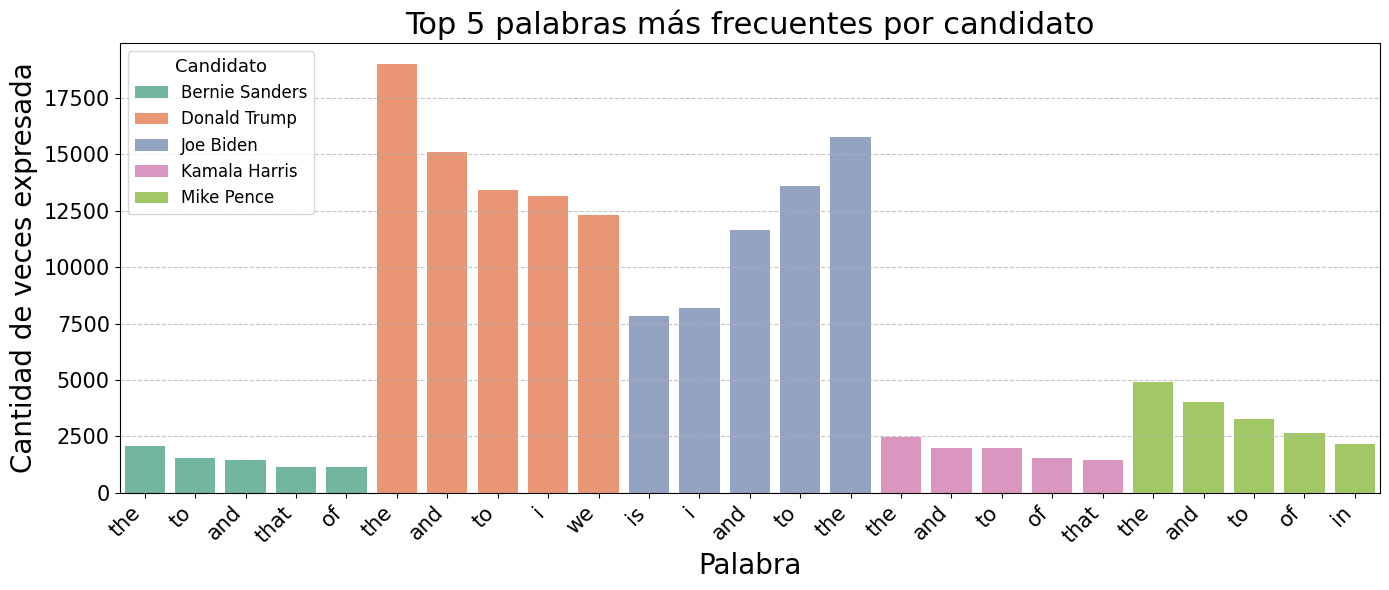

,speaker,WordList,count
0,Bernie Sanders,the,2084
1,Bernie Sanders,to,1545
2,Bernie Sanders,and,1473
3,Bernie Sanders,that,1153
4,Bernie Sanders,of,1148
5,Donald Trump,the,18999
6,Donald Trump,and,15090
7,Donald Trump,to,13415
8,Donald Trump,i,13174
9,Donald Trump,we,12316


In [110]:
# OPCION 3

# las palabras pueden repetirse entre candidatos, pero cada barra debe reflejar cuántas veces la dijo ese candidato. Para que eso funcione y las barras no se apilen, necesitamos que el eje x distinga cada ocurrencia de una palabra por cada candidato, incluso si la palabra se repite.
#La solución: mantenemos solo la palabra en el eje x (para mostrarla), pero usamos el índice del DataFrame como orden, de forma que cada barra sea única.

# Ordenar por speaker para agrupar visualmente
df_candidates_words_sorted = df_candidates_words.sort_values(by='speaker').reset_index(drop=True)

# Graficar con el índice como eje x para que no se colapsen
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_candidates_words_sorted,
    x=df_candidates_words_sorted.index,         # .index hace que cada barra sea única osea dos palabras iguales si tienen distinto index se grafican independientes
    y='count',
    hue='speaker',
    dodge=False,
    palette='Set2'
)

# Reemplazar los valores del eje x por las palabras
plt.xticks(ticks=df_candidates_words_sorted.index, labels=df_candidates_words_sorted['WordList'], rotation=45, ha='right')
plt.xlabel("Palabra", fontsize=20)
plt.xticks(rotation = 45,fontsize=15)
plt.ylabel("Cantidad de veces expresada", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Top 5 palabras más frecuentes por candidato" , fontsize=22)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de cuadrícula en el eje y
plt.legend(title="Candidato", fontsize=12, title_fontsize=13, loc='upper left', bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.show()

df_candidates_words_sorted


          speaker  TotalDifWords
1    Donald Trump          81309
2       Joe Biden          80545
4      Mike Pence          21804
0  Bernie Sanders          11905
3   Kamala Harris          11485


C:\Users\matoi\AppData\Local\Temp\ipykernel_2692\2316141010.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


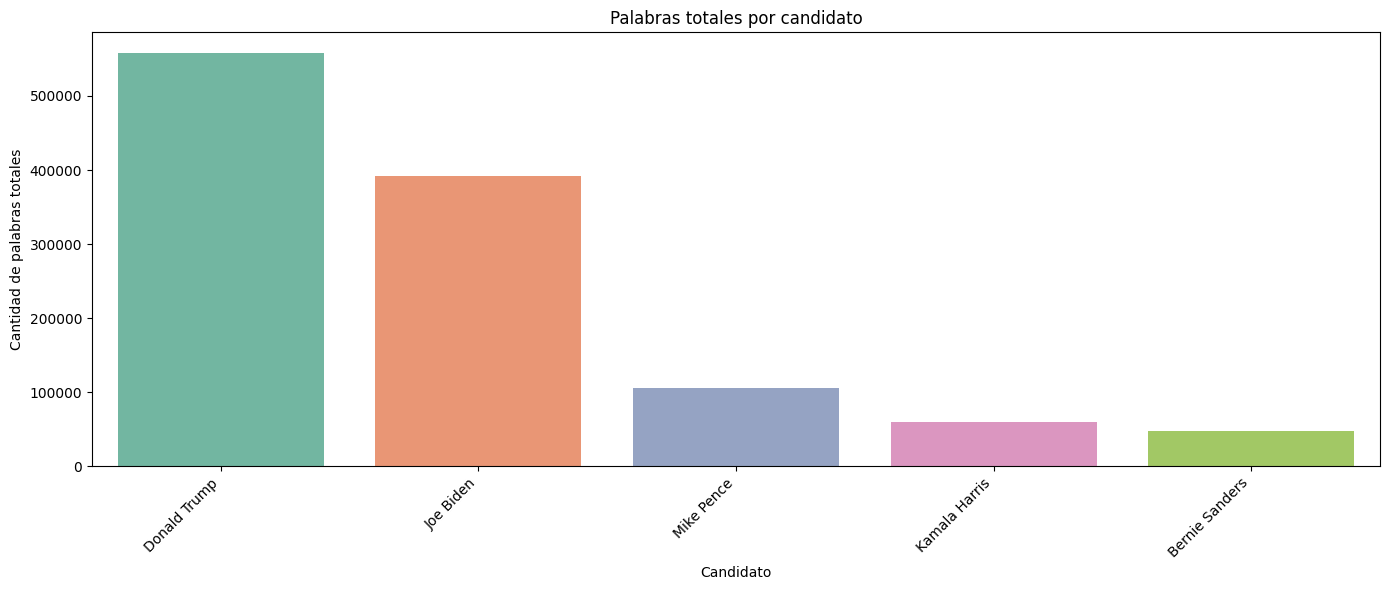

C:\Users\matoi\AppData\Local\Temp\ipykernel_2692\2316141010.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


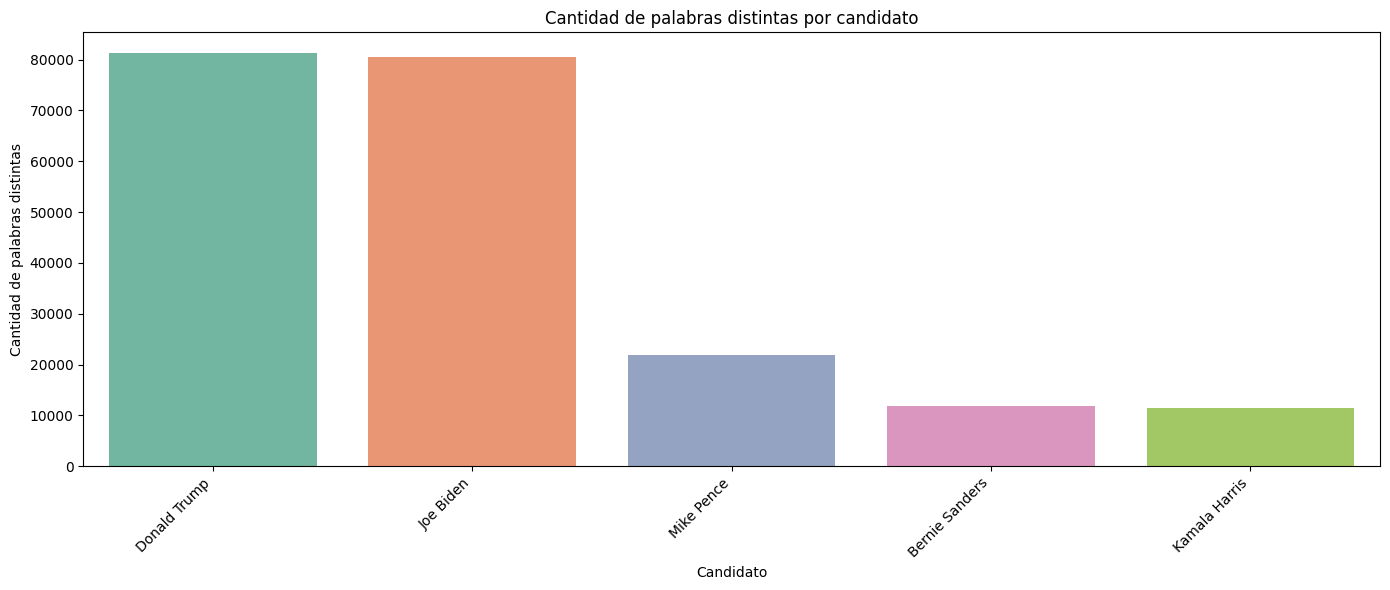

In [ ]:
# TODO: Busque los candidatos/as con mayor cantidad de palabras.

# sumar wordcount por speaker / esto nos da la cantidad de palabras totales por candidato
totalWords_df = df_speeches_top_5_df.groupby('speaker')['WordCount'].sum().reset_index(name='TotalWords').sort_values(by='TotalWords', ascending=False)
# print(totalWords_df)
                                                                 
# contar palabras distintas por speaker                                                                       
df_speeches_top_5_df['DifWords'] = df_speeches_top_5_df['WordList'].apply(lambda x: len(set(x)))

totalDifWords_df = df_speeches_top_5_df.groupby('speaker')['DifWords'].sum().reset_index(name='TotalDifWords').sort_values(by='TotalDifWords', ascending=False)
print(totalDifWords_df)


# Graficar la cantidad de palabras totales por candidato
plt.figure(figsize=(14, 6))
sns.barplot(
    data=totalWords_df,
    x=totalWords_df['speaker'],
    y=totalWords_df['TotalWords'],       
    dodge=False,
    palette='Set2'
)

plt.xticks(ticks=totalWords_df['speaker'], rotation=45, ha='right')
plt.xlabel("Candidato")
plt.ylabel("Cantidad de palabras totales")
plt.title("Palabras totales por candidato")
#plt.legend(title="Candidato")
plt.tight_layout()
plt.show() 


# Graficar la cantidad de palabras totales por candidato
plt.figure(figsize=(14, 6))
sns.barplot(
    data=totalDifWords_df,
    x=totalDifWords_df['speaker'],
    y=totalDifWords_df['TotalDifWords'],       
    dodge=False,
    palette='Set2'
)

plt.xticks(ticks=totalDifWords_df['speaker'], rotation=45, ha='right')
plt.xlabel("Candidato")
plt.ylabel("Cantidad de palabras distintas")
plt.title("Cantidad de palabras distintas por candidato")
#plt.legend(title="Candidato")
plt.tight_layout()
plt.show() 






In [ ]:
# TODO: Construya una matriz de 5x5, donde cada fila y columna corresponden a un candiato/a, 
# y la entrada (i,j) contiene la cantidad de veces que el candiato/a “i” menciona al candiato/a “j”.

# A = df_speeches_top_5_df.explode("WordList").groupby(["speaker", "WordList"])

# contar cuantas veces se menciona a cada candidato por cada candidato

df_mentions = grouped[grouped['WordList'].isin(df_speeches_top_5_df['speaker'].unique())] # Filtrar solo las palabras que son nombres de candidatos


print(df_mentions)

# mentions_matrix = ...

# Opcional: Genere un grafo dirigido con esa matriz de adyacencia para visualizar las menciones. 
# Puede ser util la biblioteca networkx

Empty DataFrame
Columns: [speaker, WordList, count]
Index: []
